# Test10

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

In [2]:
global_factor = 4

def image_open(name):
    location='from_camera/test12/'+name+'.png'
    image_im = Image.open(location)
    realsize=image_im.size
    newsize=tuple(int(ti/global_factor) for ti in realsize)
    image_im=image_im.resize(newsize,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    return image_im

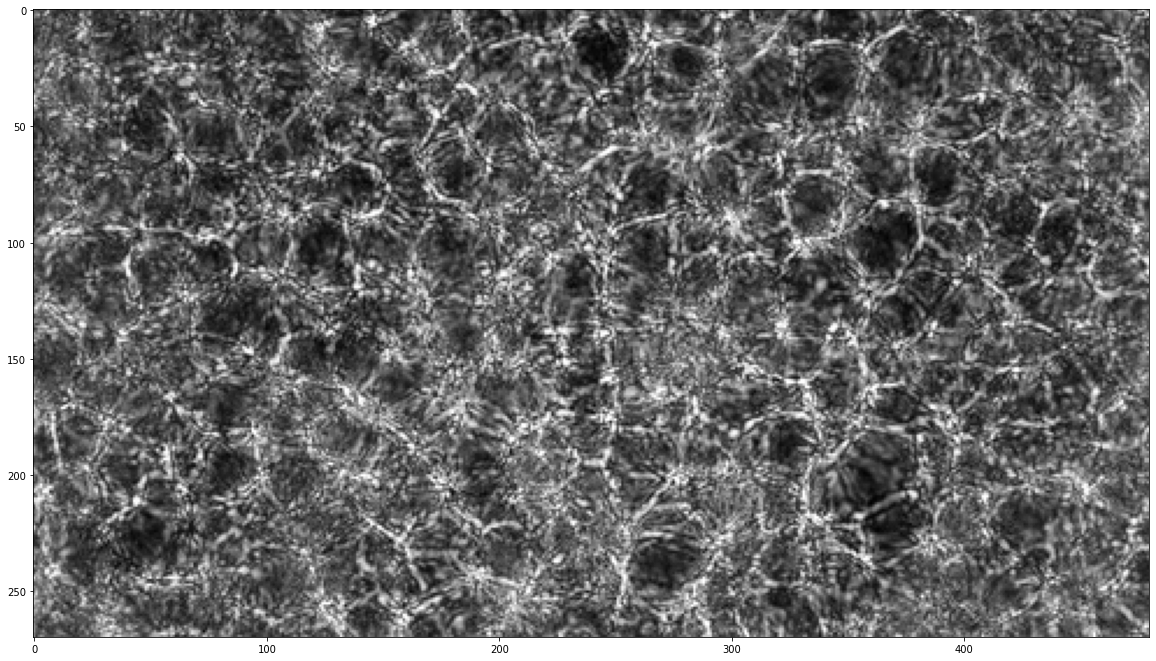

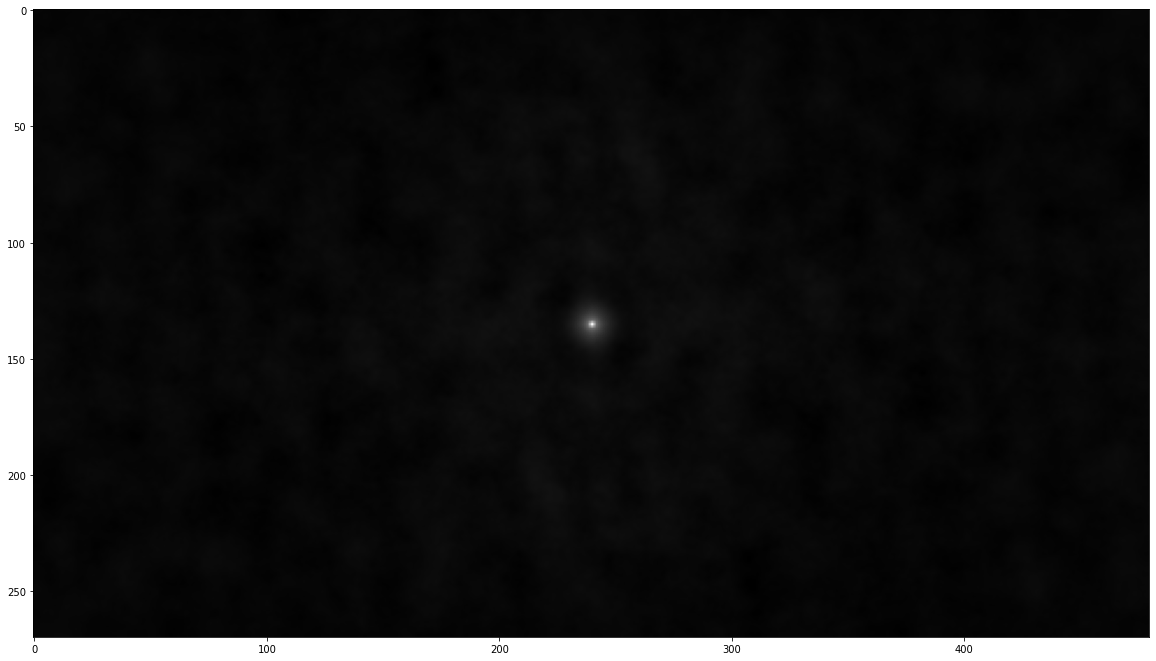

In [3]:
h = image_open('h') - image_open('background')
h -= h.mean()
plt.figure(figsize=(20,20))
plt.imshow(h,cmap='gray')
plt.savefig('resultats/test12/h.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(signal.fftconvolve(h,np.flip(h),mode='same'),cmap='gray')
plt.savefig('resultats/test12/h_auto.png', bbox_inches='tight')

plt.show()

In [4]:
numberImages = 20

def takeCapture(filename):
    out = np.zeros(h.shape)
    for i in range(numberImages):
        name = filename+str(i)
        out += image_open(name)
    out /= numberImages
    return out

In [5]:
black = takeCapture('black')
disk0 = takeCapture('0disk')-black
disk1 = takeCapture('1disk')-black
disk3 = takeCapture('3disk')-black
disk5 = takeCapture('5disk')-black
disk7 = takeCapture('7disk')-black
disk9 = takeCapture('9disk')-black
disk11 = takeCapture('11disk')-black

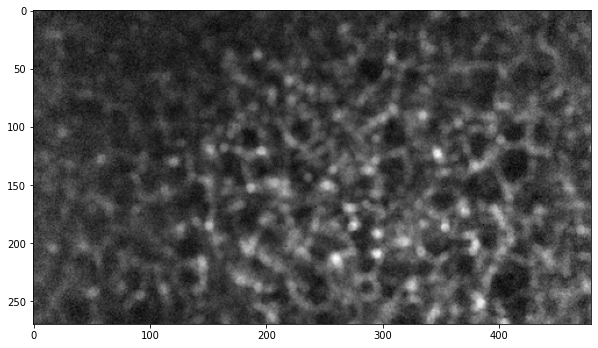

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(disk9,cmap='gray')
plt.show()

In [7]:
def estimation(imag):
    imag_hat = signal.fftconvolve(np.flip(imag),h,mode='same')
    return imag_hat

In [8]:
disk1hat = estimation(disk1)
disk3hat = estimation(disk3)
disk5hat = estimation(disk5)
disk7hat = estimation(disk7)
disk9hat = estimation(disk9)
disk11hat = estimation(disk11)

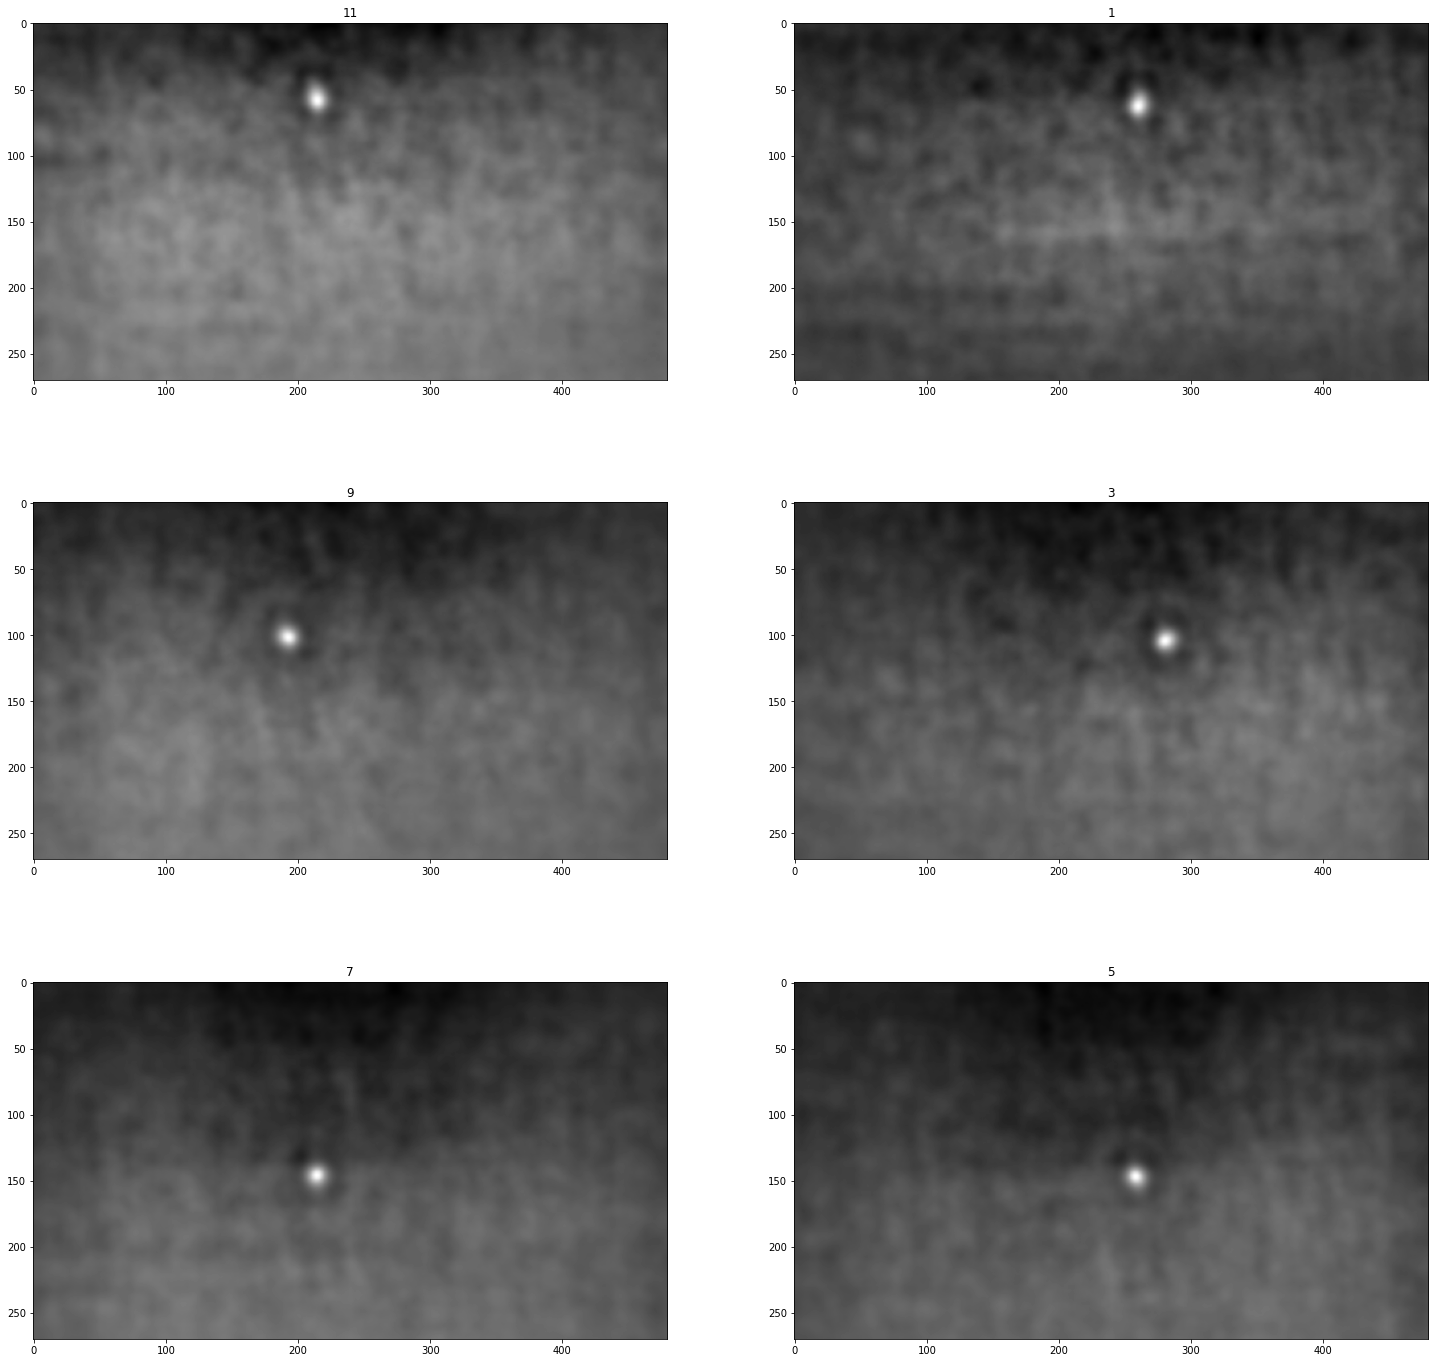

In [9]:
fig = plt.figure(figsize=(25,25))
fig.add_subplot(3, 2, 2)
plt.imshow(disk1hat,cmap='gray')
plt.title('1')
fig.add_subplot(3, 2, 4)
plt.imshow(disk3hat,cmap='gray')
plt.title('3')
fig.add_subplot(3, 2, 6)
plt.imshow(disk5hat,cmap='gray')
plt.title('5')
fig.add_subplot(3, 2, 5)
plt.imshow(disk7hat,cmap='gray')
plt.title('7')
fig.add_subplot(3, 2, 3)
plt.imshow(disk9hat,cmap='gray')
plt.title('9')
fig.add_subplot(3, 2, 1)
plt.imshow(disk11hat,cmap='gray')
plt.title('11')
plt.savefig('resultats/test12/clock.png', bbox_inches='tight')
plt.show()

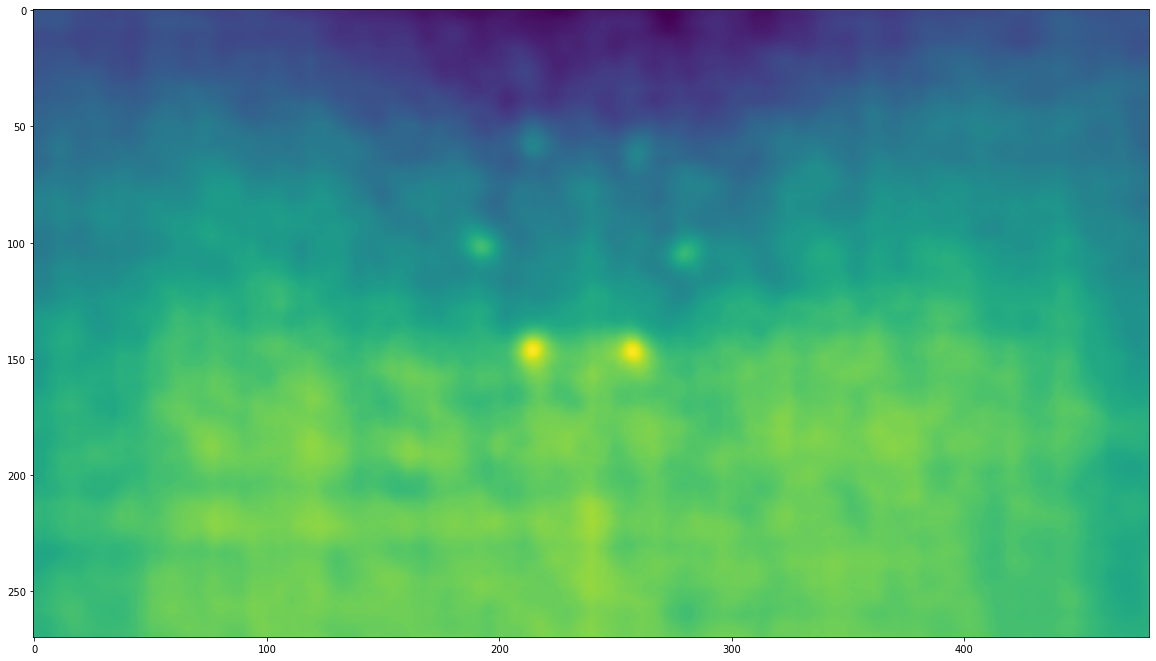

In [10]:
totalDisks = disk1hat+disk3hat+disk5hat+disk7hat+disk9hat+disk11hat
plt.figure(figsize=(20,20))
plt.imshow(totalDisks)
plt.show()

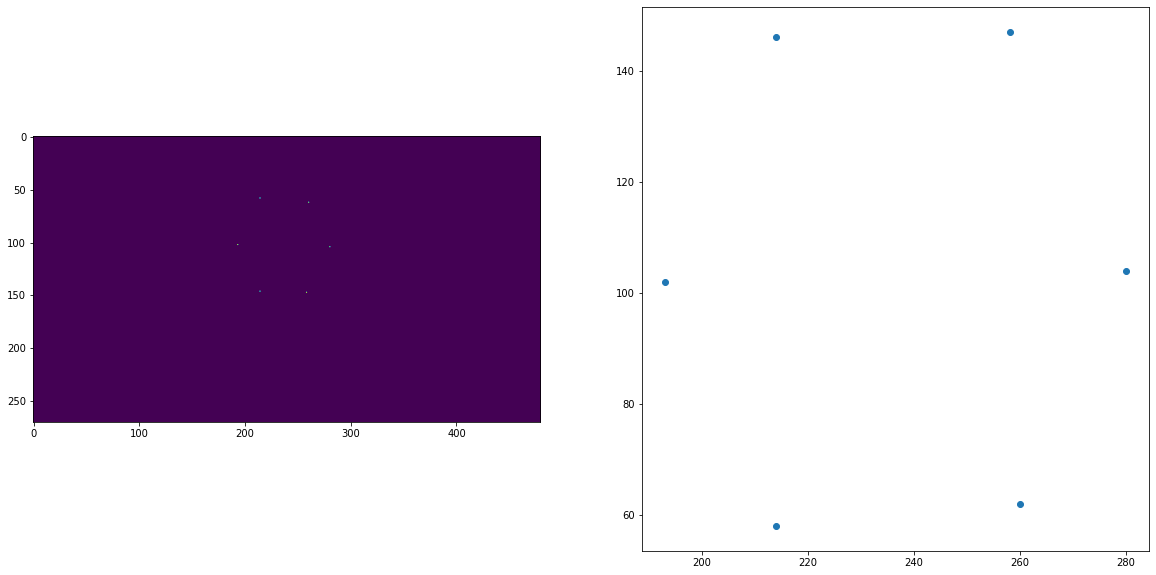

(270, 480)


In [11]:
recover_image = np.zeros(h.shape)
recover_plot = np.zeros((6,2))

names = np.array([disk1hat,disk3hat,disk5hat,disk7hat,disk9hat,disk11hat])

for i in range(len(names)):
    maxLoc = np.where(names[i]==np.amax(names[i]))
    recover_image[maxLoc] = 1
    recover_plot[i,0] = maxLoc[0]
    recover_plot[i,1] = maxLoc[1]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(recover_image)
plt.subplot(1,2,2)
plt.plot(recover_plot[:,1],recover_plot[:,0],'o')
# plt.axis([0,480,0,270])
plt.savefig('resultats/test12/plot.png', bbox_inches='tight')
plt.show()

print(h.shape)

## Part 2. D=11.3 cm

In [12]:
# vert0=110
# vertf=30
# horit0=250
# horitf=30
# est=estimation('7')[vert0:vert0+vertf,horit0:horit0+horitf]
# vertm,horitm = (np.where(est==np.amax(est)))
# vertm += vert0
# horitm += horit0
# print(vertm,horitm)

# plt.figure(figsize=(15,15))
# plt.imshow(est,cmap='gray')
# plt.savefig('resultats/test10/disk.png', bbox_inches='tight')
# plt.show()

In [13]:
# vert0=110
# vertf=30
# horit0=250
# horitf=30
# est=estimation('7')[vert0:vert0+vertf,horit0:horit0+horitf]
# vertm,horitm = (np.where(est==np.amax(est)))
# vertm += vert0
# horitm += horit0
# print(vertm,horitm)

# plt.figure(figsize=(15,15))
# plt.imshow(est,cmap='gray')
# plt.savefig('resultats/test10/disk.png', bbox_inches='tight')
# plt.show()